In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
#import dataset and name data as event
event<-read.csv('/Users/yang/Desktop/graduate/6240/hw1/events_log.csv')
head(event)

uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NA,cbeb66d1bc1f1bc2,5,NA
00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NA,eb658e8722aad674,10,NA
00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30,f99a9fc1f7fdd21e,NA,NA
0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60,e5626962a6939a75,NA,10
000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30,787dd6a4c371cbf9,NA,NA
0000a6af2baa5af1be2431e84cb01da1,2.016030e+13,f6840a9614c527ad,a,checkin,180,6fb7b9ea87012975,NA,NA


In [3]:
#create new variable daily
event$day<-substr(event$timestamp,7,8)

In [4]:
a=event %>% filter(day!='30') %>% group_by(group,day)  %>% filter(action=='visitPage') %>% summarise( count=n_distinct(session_id))
b=event %>% filter(day!='30') %>% group_by(group,day)  %>% filter(action=='searchResultPage') %>% summarise( count=n_distinct(session_id))
a$clickthrough_rate=rate=a$count/b$count

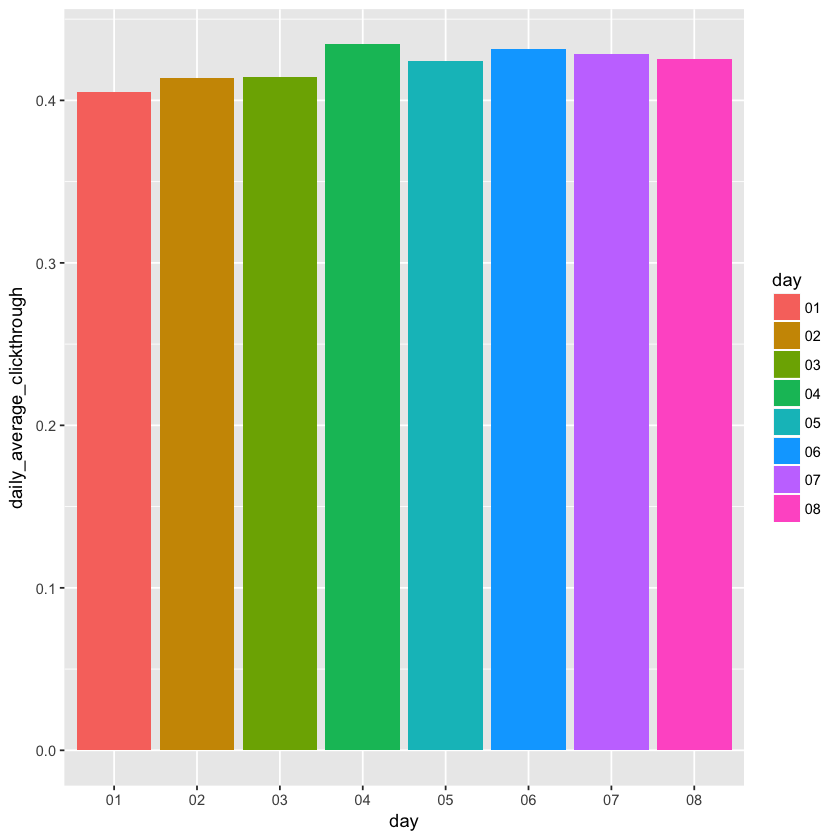

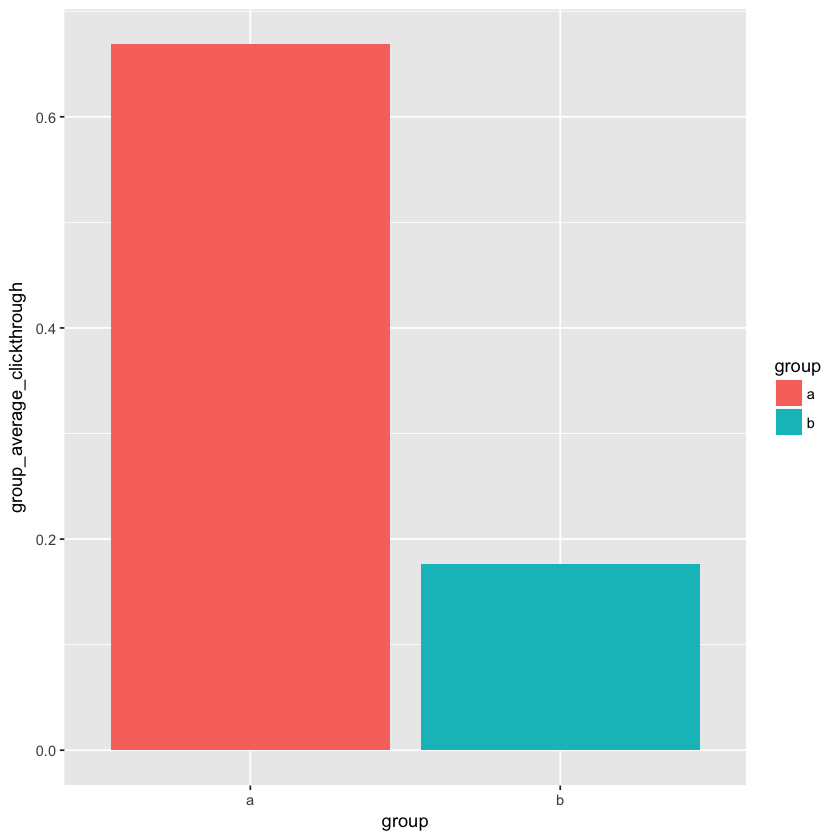

In [5]:
library(ggplot2)
a %>% group_by(day) %>% summarise(daily_average_clickthrough=mean(clickthrough_rate)) %>% ggplot(aes(x=day, y=daily_average_clickthrough,fill=day))+geom_bar(stat = 'identity')
a %>% group_by(group) %>% summarise(group_average_clickthrough=mean(clickthrough_rate)) %>% ggplot(aes(x=group, y=group_average_clickthrough,fill=group))+geom_bar(stat = 'identity')